In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score,f1_score,hamming_loss,confusion_matrix,roc_auc_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("/content/sample_data/Mall_Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
df.drop(['CustomerID'],axis=1,inplace=True)
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


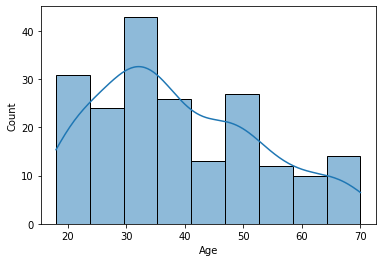

In [4]:
sns.histplot(df['Age'],kde=True)

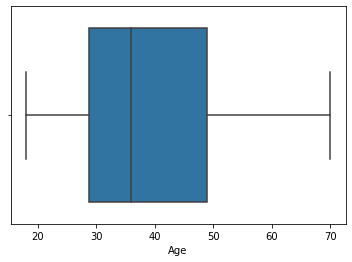

In [5]:
sns.boxplot(df['Age'],orient='h')

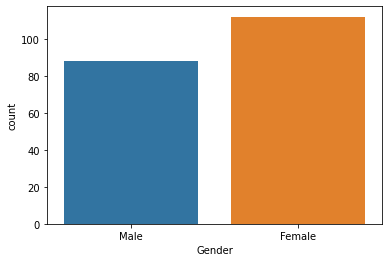

In [6]:
sns.countplot(x='Gender',data=df)

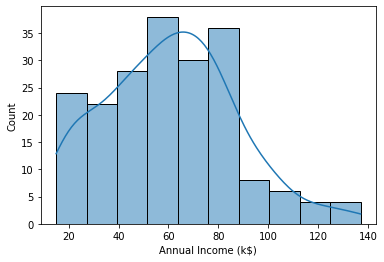

In [7]:
sns.histplot(df['Annual Income (k$)'], kde=True)

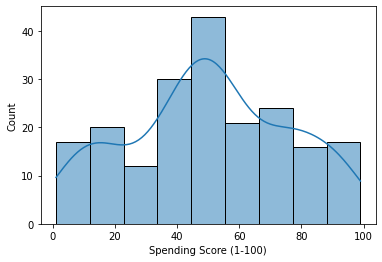

In [8]:
sns.histplot(df['Spending Score (1-100)'], kde=True)

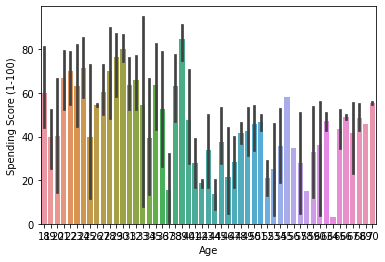

In [9]:
sns.barplot(x='Age',y='Spending Score (1-100)',data=df)

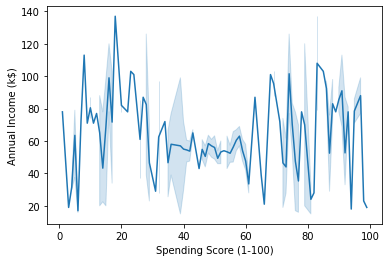

In [10]:
sns.lineplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

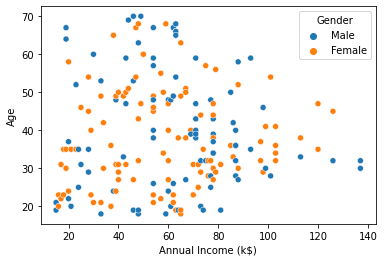

In [11]:
sns.scatterplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df)

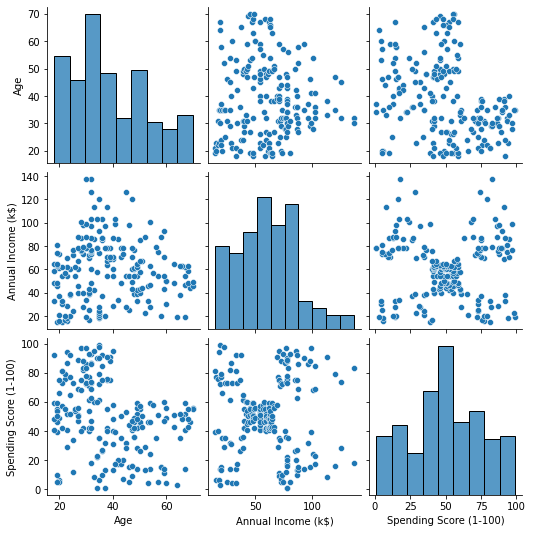

In [12]:
sns.pairplot(data=df[["Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]])

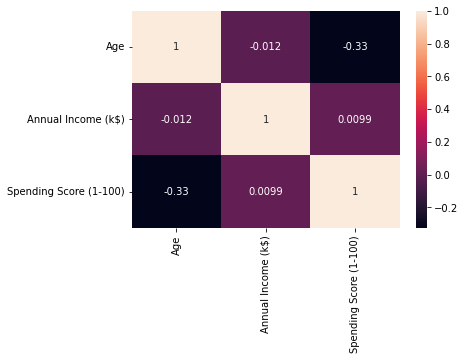

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [15]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

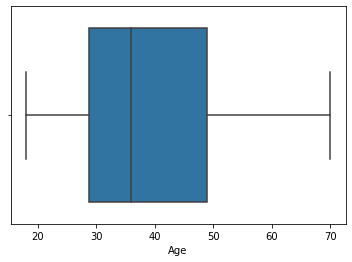

In [16]:
sns.boxplot(df['Age'], orient='h')

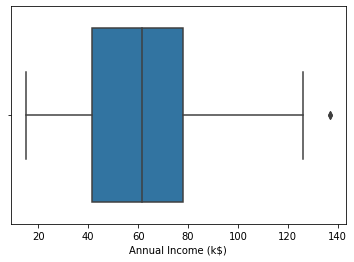

In [17]:
sns.boxplot(df['Annual Income (k$)'], orient='h')

In [18]:
q = df['Annual Income (k$)'].quantile(q=[0.75,0.25])
iqr=q.iloc[0]-q.iloc[1]
lower = q.iloc[1] - 1.5*iqr
upper = q.iloc[0] + 1.5*iqr

In [19]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper,upper,np.where(df['Annual Income (k$)']<lower,lower,df['Annual Income (k$)']))

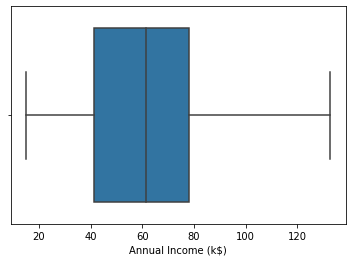

In [20]:
sns.boxplot(df['Annual Income (k$)'], orient='h')

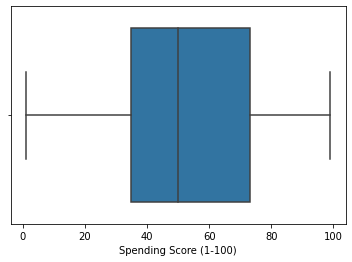

In [21]:
sns.boxplot(df['Spending Score (1-100)'], orient='h')

In [22]:
l_en = LabelEncoder()

In [23]:
df['Gender'] = l_en.fit_transform(df['Gender'])
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
5,0,22,17.0,76
6,0,35,18.0,6
7,0,23,18.0,94
8,1,64,19.0,3
9,0,30,19.0,72


In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [25]:
from sklearn.cluster import KMeans
km = KMeans(algorithm='elkan',n_init=100, max_iter=3000)
res = km.fit_predict(scaled_data)
res

array([5, 5, 4, 4, 4, 4, 7, 4, 6, 4, 6, 4, 7, 4, 2, 5, 4, 5, 6, 4, 5, 5,
       7, 5, 7, 5, 7, 5, 7, 4, 6, 4, 6, 5, 7, 4, 7, 4, 7, 4, 7, 5, 6, 4,
       7, 4, 7, 4, 4, 4, 7, 5, 4, 6, 7, 6, 7, 6, 4, 6, 6, 5, 7, 7, 6, 5,
       7, 7, 5, 4, 6, 7, 7, 7, 6, 5, 7, 5, 4, 7, 6, 5, 6, 7, 4, 6, 7, 4,
       4, 7, 7, 5, 6, 7, 4, 5, 7, 4, 6, 5, 4, 7, 6, 5, 6, 4, 7, 6, 6, 6,
       6, 4, 0, 5, 4, 4, 7, 7, 7, 7, 5, 0, 3, 1, 0, 3, 2, 1, 6, 1, 2, 1,
       0, 3, 2, 3, 0, 1, 2, 3, 0, 1, 0, 3, 2, 1, 6, 3, 0, 1, 2, 1, 0, 3,
       0, 3, 2, 3, 2, 3, 7, 3, 2, 3, 2, 3, 2, 3, 0, 1, 2, 1, 2, 1, 0, 3,
       6, 1, 6, 1, 0, 3, 2, 3, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 0, 3, 0, 1,
       2, 1], dtype=int32)

In [26]:
df1 = pd.DataFrame(scaled_data, columns = df.columns)
df1.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959
5,0.0,0.076923,0.016985,0.765306
6,0.0,0.326923,0.025478,0.051020
7,0.0,0.096154,0.025478,0.948980
8,1.0,0.884615,0.033970,0.020408
9,0.0,0.230769,0.033970,0.724490


In [27]:
df1['Cluster']  = pd.Series(res)
df1.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.019231,0.000000,0.387755,5
1,1.0,0.057692,0.000000,0.816327,5
2,0.0,0.038462,0.008493,0.051020,4
3,0.0,0.096154,0.008493,0.775510,4
4,0.0,0.250000,0.016985,0.397959,4
5,0.0,0.076923,0.016985,0.765306,4
6,0.0,0.326923,0.025478,0.051020,7
7,0.0,0.096154,0.025478,0.948980,4
8,1.0,0.884615,0.033970,0.020408,6
9,0.0,0.230769,0.033970,0.724490,4


In [28]:
df1['Cluster'].unique()

array([5, 4, 7, 6, 2, 0, 3, 1], dtype=int32)

In [29]:
df1['Cluster'].value_counts()

7    37
4    34
6    29
5    24
3    22
0    19
1    18
2    17
Name: Cluster, dtype: int64

In [44]:
X = df1.iloc[:,0:4]
print(X.head(10))
y = df1.iloc[:,4:]
print(y.head(10))

   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0     1.0  0.019231            0.000000                0.387755
1     1.0  0.057692            0.000000                0.816327
2     0.0  0.038462            0.008493                0.051020
3     0.0  0.096154            0.008493                0.775510
4     0.0  0.250000            0.016985                0.397959
5     0.0  0.076923            0.016985                0.765306
6     0.0  0.326923            0.025478                0.051020
7     0.0  0.096154            0.025478                0.948980
8     1.0  0.884615            0.033970                0.020408
9     0.0  0.230769            0.033970                0.724490
   Cluster
0        5
1        5
2        4
3        4
4        4
5        4
6        7
7        4
8        6
9        4


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265
5,0.0,0.076923,0.016985,0.765306
127,1.0,0.423077,0.475584,0.959184
105,0.0,0.057692,0.399151,0.418367
48,0.0,0.211538,0.212314,0.418367
66,0.0,0.480769,0.280255,0.500000


In [32]:
X_test.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755
198,1.0,0.269231,1.000000,0.173469
95,1.0,0.115385,0.382166,0.520408
4,0.0,0.250000,0.016985,0.397959
29,0.0,0.096154,0.118896,0.877551
168,0.0,0.346154,0.611465,0.265306


In [33]:
y_train.head(10)

,Cluster
116,7
67,7
78,4
42,6
17,5
5,4
127,1
105,4
48,4
66,7


In [34]:
y_test.head(10)

,Cluster
58,4
40,7
34,7
102,6
184,0
198,2
95,5
4,4
29,4
168,0


In [35]:
classifier_model = SVC(decision_function_shape='ovo')

In [36]:
classifier_model.fit(X_train,y_train.values.flatten())

SVC(decision_function_shape='ovo')

In [37]:
pred_y = classifier_model.predict(X_test)
pred_y[0:5]

array([4, 7, 7, 6, 0], dtype=int32)

In [38]:
print('Classification Report: ')
print(classification_report(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00         4
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00        11

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60



Confusion Matrix: 


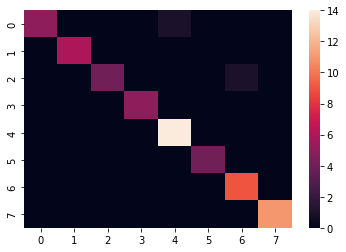

In [39]:
print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test,pred_y))

In [40]:
print('F1 Score: ',f1_score(y_test,pred_y, average='weighted'))

F1 Score:  0.9657091177962321


In [41]:
print('Hamming Loss: ',hamming_loss(y_test,pred_y))

Hamming Loss:  0.03333333333333333


In [42]:
print('Accuracy: ',accuracy_score(y_test,pred_y))

Accuracy:  0.9666666666666667
